In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.functional import F
from copy import copy
import seaborn as sns
import torch
from torchviz import make_dot
import hiddenlayer as hl
import torchvision.models

### Creating Tensors

In [3]:
def describe(x):
    print("Type: {}".format(x.type()))
    print("Shape/size: {}".format(x.shape))
    print("Values: \n {}".format(x))

In [4]:
# Random values all over the place.
describe(torch.Tensor(2, 2))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
 tensor([[0., 0.],
        [0., 0.]])


In [5]:
# Uniform random numbers on [0, 1).
describe(torch.rand(2, 3))

# Normal mean 0 and vairance 1.
describe(torch.randn(2, 3))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[0.2656, 0.0540, 0.5353],
        [0.6084, 0.1321, 0.5964]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[-1.6852, -0.0981, -1.6725],
        [ 0.1451, -0.1875, -0.9065]])


In [6]:
# A vector of zeros.
describe(torch.zeros(2, 3))

x = torch.ones(2, 3)

describe(x)

# We can fill a vector with a specific value.
x.fill_(5)

describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [7]:
# You can get a tensor from a list.
x = torch.Tensor([
    [1, 2, 3],
    [4, 5, 6]
])
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [8]:
# You can also get them from numpy.
describe(torch.from_numpy(np.random.rand(2,3)))

Type: torch.DoubleTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[0.9282, 0.3767, 0.0211],
        [0.4157, 0.6873, 0.0793]], dtype=torch.float64)


### Tensor Types and Size

In [9]:
x = torch.FloatTensor(
    [[1,2,3,], [4, 5, 6]]
)
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [10]:
x = x.long()
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[1, 2, 3],
        [4, 5, 6]])


In [11]:
# Make a tensor from an array.
x = x = torch.tensor(
    [[1,2,3,], [4, 5, 6]],
    dtype=torch.int64
)

In [12]:
x = x.float()
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[1., 2., 3.],
        [4., 5., 6.]])


### Tensor Operations

In [13]:
x = torch.rand(2, 3)
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[0.8922, 0.9459, 0.6179],
        [0.6696, 0.0111, 0.2822]])


In [14]:
describe(torch.add(x, x))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[1.7844, 1.8918, 1.2358],
        [1.3393, 0.0222, 0.5644]])


In [15]:
describe(x + x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[1.7844, 1.8918, 1.2358],
        [1.3393, 0.0222, 0.5644]])


In [16]:
x = torch.arange(6)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([6])
Values: 
 tensor([0, 1, 2, 3, 4, 5])


In [17]:
describe(x.view(2, 3))

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[0, 1, 2],
        [3, 4, 5]])


In [18]:
# This is very cool.
describe(x.view(2, -1))

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[0, 1, 2],
        [3, 4, 5]])


In [19]:
describe(x.view(-1, 3))

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[0, 1, 2],
        [3, 4, 5]])


In [20]:
# Note that dimension 0, the rows, vanish. This is column sums.
describe(torch.sum(x.view(2, -1), dim=0))

Type: torch.LongTensor
Shape/size: torch.Size([3])
Values: 
 tensor([3, 5, 7])


In [21]:
# Note that dimension 0, the rows, vanish. This is column sums.
describe(x.view(2, -1).sum(axis=0))

Type: torch.LongTensor
Shape/size: torch.Size([3])
Values: 
 tensor([3, 5, 7])


In [22]:
# Note that dimension 0, the rows, vanish. This is column sums.
describe(torch.transpose(x.view(2, 3), 0, 1))

Type: torch.LongTensor
Shape/size: torch.Size([3, 2])
Values: 
 tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [23]:
# Fip the data.
describe(torch.flip(x.view(2, 3), [0]))

describe(torch.flip(x.view(2, 3), [0, 1]))

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[3, 4, 5],
        [0, 1, 2]])
Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[5, 4, 3],
        [2, 1, 0]])


### Indexing, Slicing, Joining

In [24]:
x = torch.arange(6).view(2, 3)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[0, 1, 2],
        [3, 4, 5]])


In [25]:
describe(x[:1, :2])

Type: torch.LongTensor
Shape/size: torch.Size([1, 2])
Values: 
 tensor([[0, 1]])


In [26]:
describe(x[0, 1])

Type: torch.LongTensor
Shape/size: torch.Size([])
Values: 
 1


In [27]:
# Get the actual value in the tensor.
x[0, 1].item()

1

In [28]:
x

tensor([[0, 1, 2],
        [3, 4, 5]])

In [29]:
indices = torch.LongTensor([0, 2])

In [30]:
# Take from the columns the elements 0 and 2.
describe(torch.index_select(x, dim=1, index=indices))

Type: torch.LongTensor
Shape/size: torch.Size([2, 2])
Values: 
 tensor([[0, 2],
        [3, 5]])


In [31]:
# Similar.
indices = torch.LongTensor([0, 0])
describe(torch.index_select(x, dim=0, index=indices))

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[0, 1, 2],
        [0, 1, 2]])


In [32]:
# Indices must be LongTensor.
row_indices = torch.arange(2).long()
col_indices = torch.LongTensor([0, 1])
describe(x[row_indices, col_indices])

Type: torch.LongTensor
Shape/size: torch.Size([2])
Values: 
 tensor([0, 4])


In [33]:
# Join two tensors on rows. "The rows dimension increases." This gives 1 tensor.
describe(torch.cat([x, x], dim=0))

Type: torch.LongTensor
Shape/size: torch.Size([4, 3])
Values: 
 tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])


In [34]:
# Join two tensors on columns. "The columns dimension increases." This gives 1 tensor.
describe(torch.cat([x, x], dim=1))

Type: torch.LongTensor
Shape/size: torch.Size([2, 6])
Values: 
 tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])


In [35]:
# This can be used to create batches! Notice a new dimension is added. This gives "2" tensors.
describe(torch.stack([x, x]))

Type: torch.LongTensor
Shape/size: torch.Size([2, 2, 3])
Values: 
 tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


In [36]:
# Can do linear algebra operations.
x2 = torch.ones(3, 2)
x2[:, 1] += 1
describe(x2)

Type: torch.FloatTensor
Shape/size: torch.Size([3, 2])
Values: 
 tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])


In [37]:
x1 = torch.arange(6).view(2, 3)
describe(x1)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
 tensor([[0, 1, 2],
        [3, 4, 5]])


In [38]:
# Does not like different types. This will crash!
describe(torch.mm(x1, x2))

RuntimeError: expected scalar type Long but found Float

In [ ]:
describe(torch.mm(x1.float(), x2))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
 tensor([[ 3.,  6.],
        [12., 24.]])


### A basic example with differentiation

In [ ]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.5, requires_grad=True) 

x = torch.tensor([1.4])
y = torch.tensor([2.1])

z = torch.add(torch.mul(w, x), b)
 
loss = (y-z).pow(2).sum()
loss.backward()

print('dL/dw : ', w.grad)
print('dL/db : ', b.grad)

# Verifying the computed gradient dL/dw - manually.
print(2 * x * ((w * x + b) - y))

### Tensors and Computational graphs
- Consider $y_1 = (wx + b + 1)^{\intercal} (wx)$ + 3 where $w$ and $b$ are parameters.
 - $y_1$ is of dimension $1$.
- Consider $y_2 = (wx + b + 1) * (wx)$ + 3 where $w$ and $b$ are parameters.
 - $y_2$ is of dimension $2 \times 1$.

In [ ]:
x = torch.ones(2, 1, requires_grad=False)
w = torch.ones(2, 2, requires_grad=True)
b = torch.ones(2, 1, requires_grad=True)

describe(w)
assert(w.grad is None)
assert(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
 tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
y1 = (torch.mm(w, x) + b + 1).t() @ (torch.mm(w, x)) + 3
y2 = (w @ x + b + 1) * (w @ x) + 3

In [ ]:
describe(y1)

Type: torch.FloatTensor
Shape/size: torch.Size([1, 1])
Values: 
 tensor([[19.]], grad_fn=<AddBackward0>)


In [ ]:
# Forward pass.
z1 = y1.mean()
describe(z1)
# Backward pass - chain rule!
z1.backward()
assert(w.grad is not None)
print(w.grad, b.grad)

Type: torch.FloatTensor
Shape/size: torch.Size([])
Values: 
 19.0
tensor([[6., 6.],
        [6., 6.]]) tensor([[2.],
        [2.]])


In [ ]:
# You can't do gradients if gradients are disabled!
with torch.no_grad():
    z2 = y2.mean()
    describe(z2)
    z2.backward()
    assert(w.grad is not None)
    print(w.grad, b.grad)

Type: torch.FloatTensor
Shape/size: torch.Size([])
Values: 
 11.0


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

### Using PyTorch as an Optimizer

We want to optimize the function $f(x) = a e^{-bx} + c$ over $(a, b, c)$ where $y$ is generated like $0.7 * e^{-0.01 * x} + 0.2 + Z(0, 1)$ where $Z$ is a standard normal and $x$ is in $[1, 2, \ldots, n]$. So, $x_i = i$.

Do we converge to the right values?

Generally, the pattern to get the converge to the right answer is:
- Pick some learning rate $\lambda$
- Specify a loss. Here, we use a mean squared error loss, given $x_i$ and true $y_i$, find $a, b, c$ so that $L(a, b, c) = \sum_{i=1}^{n}{(f(x_i) - y_i)^2}$ is as small as possible.

Then you have:
- While you keep making progress on $L(a, b, c)$
 - Compute $\frac{dL}{da}$, $\frac{dL}{db}$, $\frac{dL}{dc}$ by the chain rule.
 -  Set $a = a - \lambda \frac{dL}{da}$ and similarly for other parameters.
 - Continue this process (loop over the entire data over and over again) for as many iterations as needed: look at $L(a, b, c)$ and see when there is no more progress.

At a high level, this is what is happenig when you optimize. Other optimizers might have more complicated rules.

When you have lots of data, $n$ is large, computing $L(a, b, c)$ over the entire data set is expensive. You don't want to pass over the entire dataset.

What you can do is divide the data into batches of size $B << n$ and make the above updates over batches over and over until you cover the entire dataset. I.e., You find $B_1, B_2, \ldots, B_K$ that cover $\{1, 2, \ldots, n\}$ and $B_k$ are disjoint. Then you do the above loop over each batch, until you get to the entie set of size $n$.

Effectively, you have two loops: one for $n$ (how may times do you go over the entire data) and one for $i$ (the batch iterator).

- While you keep making progress on $L(a, b, c)$
 - For each $B_k$ until you cover the entire data.
   - Compute $\frac{dL}{da}$, $\frac{dL}{db}$, $\frac{dL}{dc}$ by the chain rule on B_i.
   - Set $a = a - \lambda \frac{dL}{da}$ and similarly for other parameters.
   - Continue this process (loop over the entire data over and over again) for as many iterations as needed: look at $L(a, b, c)$ and see when there is no more progress
   
PyTorch does all this for us!

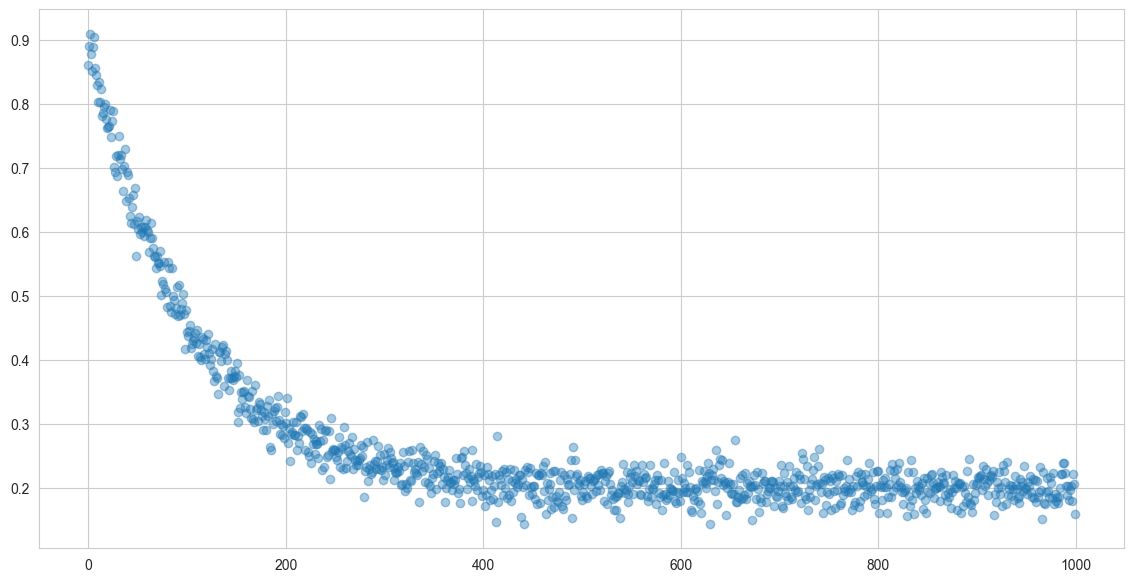

In [ ]:
sns.set_style("whitegrid")
n = 1000
noise = torch.Tensor(np.random.normal(0, 0.02, size=n))
x = torch.arange(n)
# Ground truth parameters.
a, b, c = 0.7, .01, 0.2
y = a * np.exp(-b * x) + c + noise
plt.figure(figsize=(14, 7))
plt.scatter(x, y, alpha=0.4)

In [ ]:
class Model(nn.Module):
    """Custom Pytorch model for gradient optimization.
    """
    def __init__(self):
        
        super().__init__()
        # Initialize weights with random numbers.
        weights = torch.distributions.Uniform(0, 0.1).sample((3,))
        # Make weights torch parameters.
        self.weights = nn.Parameter(weights)        
        
    def forward(self, X):
        """
        Implement function to be optimised. In this case, an exponential decay
        function (a + exp(-b * x) + b),
        """
        a, b, c = self.weights
        return a * torch.exp(-b * x) + c

Set up a training loop.

In [ ]:
def train(model, optimizer, epochs=10000):
    "Training loop for torch model."
    losses = []
    for _ in range(epochs):
        preds = model(x)
        # Could have also used nn.MSELoss()(preds, y) below.
        loss = F.mse_loss(preds, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        losses.append(loss)  
    return losses

Print the loss function and the final parameters.

Parameter containing:
tensor([0.6838, 0.0097, 0.1994], requires_grad=True)


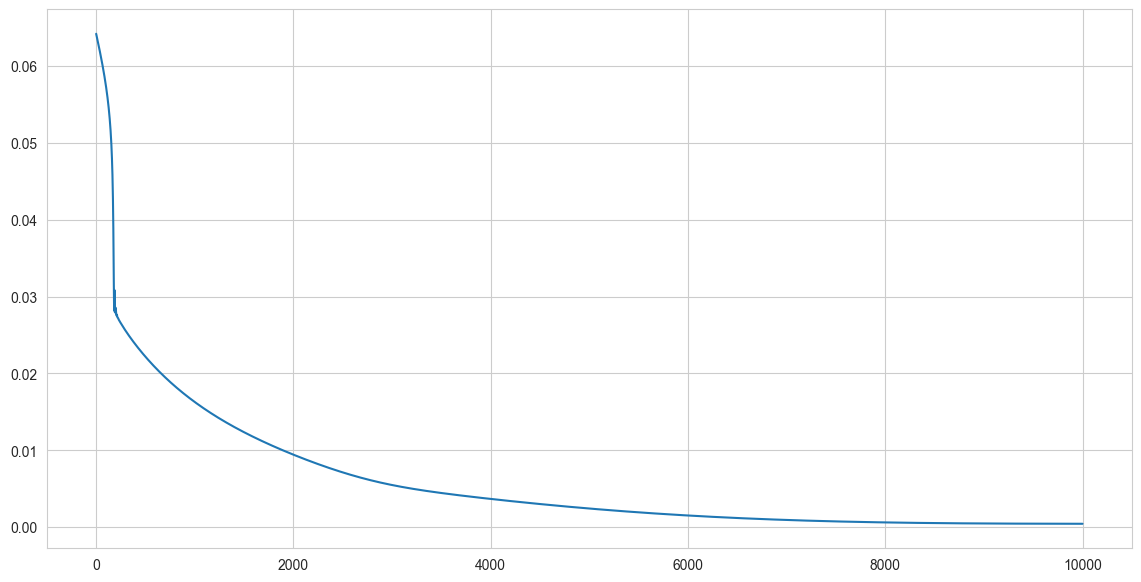

In [ ]:
# Instantiate model
model = Model()
# Instantiate optimizer - you can use SGD or Adam.
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

losses = train(model, optimizer)

with torch.no_grad():
    plt.figure(figsize=(14, 7))
    plt.plot(losses)
    print(model.weights)

### Basic NN building blocks

We want to add nonlinearities to the data when we build models, nonlinearities are the $key$.

Basically, you take your neurons $z$ through layers of different nonlinearities.

Usually z, whatever goes in before the (specifically, sigmoid) activation, is called a "logit". 

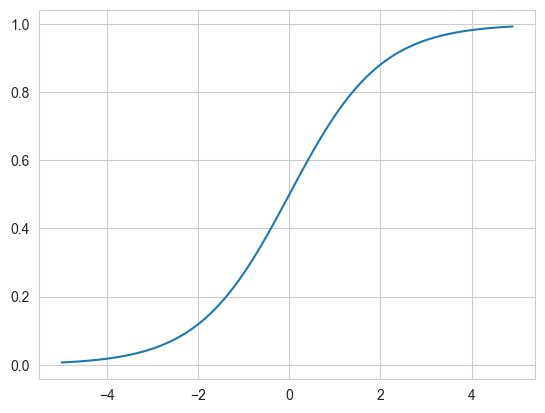

In [ ]:
# Sigmoid.
# Maps to the range [0, 1]. Notice that large and small values have a gradient of 0!
x = torch.arange(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.detach().numpy())
plt.show()

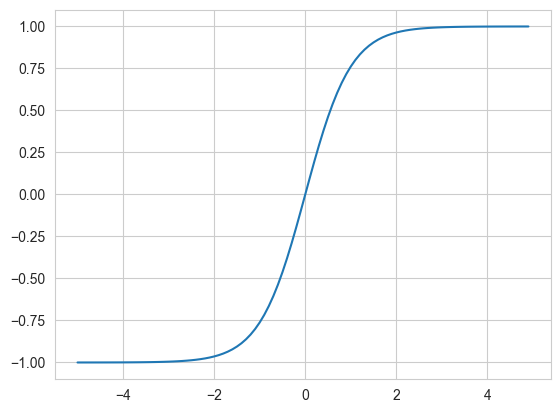

In [ ]:
# Tanh - sort of like sigmoid but maps to [-1, 1].
x = torch.arange(-5., 5., 0.1)
y = torch.tanh(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

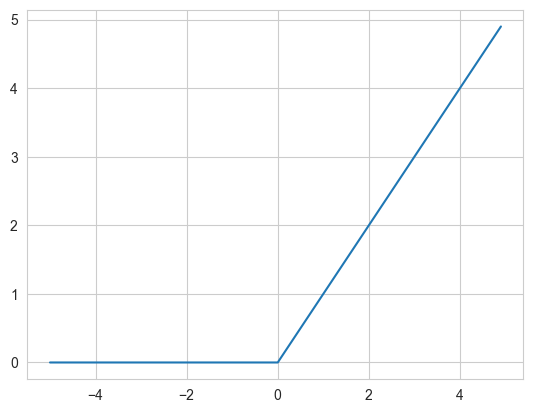

In [ ]:
# ReLU - notice that anything > 0 has a gradient of 1.
relu = torch.nn.ReLU()
x = torch.arange(-5., 5., 0.1)
y = relu(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

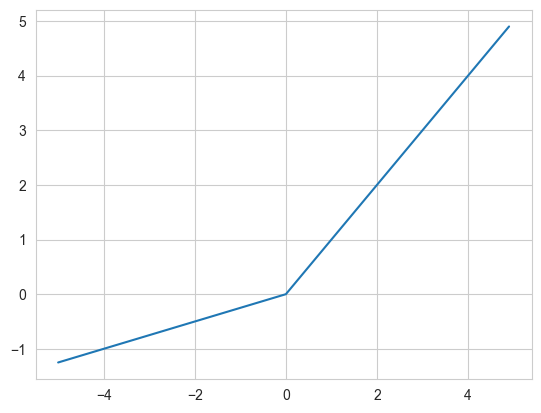

In [ ]:
# PReLU - now negative values also have a nonzero gradient.
prelu = nn.PReLU(num_parameters=1)
x = torch.arange(-5., 5., 0.1)
y = prelu(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

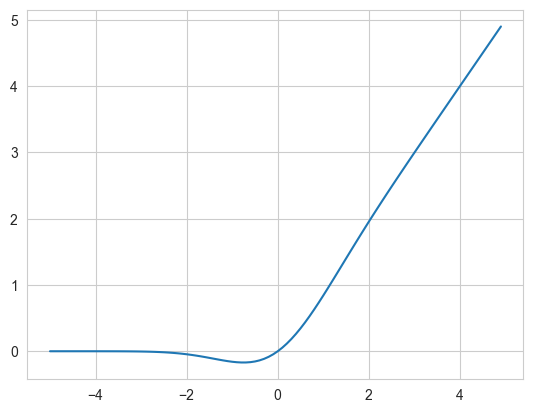

In [ ]:
# GeLU - A continuus ReLU.
gelu = torch.nn.GELU()
x = torch.arange(-5., 5., 0.1)
y = gelu(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

In [ ]:
# Softmax - how to go from any values to a probability vector.
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
# The logits.
print(x_input)
print(y_output)
# This is 1, as expected-> nn.Softmax(dim=k)(y).sum(axis=k) == vector of ones.
print(torch.sum(y_output, dim=1))

tensor([[1.2989, 0.5971, 0.9549]])
tensor([[0.4536, 0.2248, 0.3216]])
tensor([1.])


## The below is $\frac{\sum_{i=1}^{3}{\sum_{j=1}^{5}(\hat{y}_{ij} - y_{ij})^{2}}}{15}$.

In [78]:
# Mean squared error: used to get (y^ - y)^2. A Useful metric for regression problems.
mse_loss = nn.MSELoss(reduction='mean')
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
loss.backward()
print(loss)

tensor(2.0464, grad_fn=<MseLossBackward0>)


Given a model that gives us probabilitities of a certain class $(p_1, \ldots, p_K)$ we want to know if this is a ood model. For a fixed $y$ which is a vector that is 1 for the true class and 0 for all other classes we can compute $$L = -\sum_{k=1}^{K}{y_k \log{p_k}}$$ The idea is that only one of these $y_k$ will be 1 all all others will be 0 so this reduces; let the true class be $k^{*}$ so this is $-\log{p_{k^{*}}}$. We basically want this to be $low$ so that $p_{k^{*}}$ is \textit{large} (and vice versa). The Cross Entropy basically is a measure of how good your log probabilities align with the truth, represented by the $y$ vector.

For the binary case, we have binary cross entropy, which is $-(1-y) \log(1-p) - y \log p$. Notive this is the same thing as above if we let $(y_0, y_1) = (1-y, y)$ and $(p_0, p_1) = (1-p, p)$.

In [39]:
ce_loss = nn.CrossEntropyLoss()
# A data of size batch 3 over 5 classes. Notice these are logits - no softmax applied yet!
outputs = torch.randn(3, 5, requires_grad=True)
# The true labels.
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
loss.backward()
print (loss)

tensor(2.7697, grad_fn=<NllLossBackward0>)


In [80]:
# Here, we need to use probabilities.
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
print(probabilities)

targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1)
loss = bce_loss(probabilities, targets)
loss.backward()
print(loss)

tensor([[0.3919],
        [0.4455],
        [0.5090],
        [0.6637]], grad_fn=<SigmoidBackward0>)
tensor(0.8229, grad_fn=<BinaryCrossEntropyBackward0>)


### Basic Neural Network Classification Objectives

Watch out for this in the case of binary classsification problems:
- nn.BCEWithLogitsLoss()(logits, target) == nn.BCELoss()(nn.Sigmoid()(logits), target)

In [40]:
with torch.no_grad():
    logits = torch.randn(3, requires_grad=True)
    target = torch.empty(3).random_(2)
    
    # This expects raw logits. This is preferred.
    loss_1 = nn.BCEWithLogitsLoss()
    output_1 = loss_1(logits, target)
    
    # This expects tat you took the sigmoid of the logits and then gave the probabilities.
    loss_2 = nn.BCELoss()
    output_2 = loss_2(nn.Sigmoid()(logits), target)
    
    assert((output_1.item() - output_2.item()) <= 0.0001)    

Watch out for this in the case of multiclass problems:
- torch.log(nn.Softmax(dim=1)(logits)) = nn.LogSoftmax()(logits)
- nn.CrossEntropyLoss()(logits, target) == nn.NLLLoss()(nn.LogSoftmax(logits), target)

In [82]:
with torch.no_grad():
    # Example of target with class indices
    logits = torch.randn(3, 5, requires_grad=True)
    # Targets are ints here; they can also be class probabilities.
    target = torch.empty(3, dtype=torch.long).random_(5)
    
    loss_1 = nn.CrossEntropyLoss()
    output_1 = loss_1(logits, target)
    
    loss_2 = nn.NLLLoss()
    output_2 = loss_1(nn.LogSoftmax(dim=1)(logits), target)
    
    # torch.log + nn.Softmax = nn.LogSoftmax
    # Basically equal but if you dig in you'll see torch.eq is false.
    assert(
        (
            (torch.log(nn.Softmax(dim=1)(logits)) - nn.LogSoftmax(dim=1)(logits))**2
        ).sum() <= 0.0001
    )
    
    
    # nn.CrossEntropyLoss on logits == nn.NLLLoss + nn.LogSoftmax on logits
    assert(output_1.item() == output_2.item())

### Summary:
- CrossEntropyLoss wants logits (before softmax).
- BCELoss wants probabilities.
- Be careful.